<a href="https://colab.research.google.com/github/scorpion8567460/Test8567460/blob/main/Twitter_Sentiment_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
! pip install kaggle

**Upload Your Kaggle .json file**

In [46]:
# configure the path of kaggle .json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing Twitter-sentiment-Dataset**

In [47]:
#API to fatch the data set from kaggle
#!/bin/bash
!kaggle datasets download saurabhshahane/twitter-sentiment-dataset

Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
twitter-sentiment-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


**Extracting The imported Dataset**

In [48]:
# extracting the compressed dataset

from zipfile import ZipFile
dataset = '/content/twitter-sentiment-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


**Importing The Dependencies**

In [49]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [50]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
# Printing the stopwords in english
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**Data Processing**

In [59]:
# loading the data from csv file to Pandas Dataframes
twitter_dataset = pd.read_csv('/content/Twitter_Data.csv', encoding = 'ISO.8859-1')

In [60]:
# Checking the rows and column
twitter_dataset.shape

(162980, 2)

In [61]:
# Printing the first 5 rows of dataframe
twitter_dataset.head()

,clean_text,category
0,when modi promised âminimum government maxim...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [62]:
# checking the distribution of target column
twitter_dataset['category'].value_counts()

,count
category,
1.0,72250
0.0,55213
-1.0,35510


1 ---> Positive

0 ---> Neutral

-1 --> Negitive

**Stemming**

Stemming the process Reducing a word to its root word.

Example: actor,actress,acting = act

In [63]:
port_stem = PorterStemmer()

In [73]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

port_stem = PorterStemmer()

def stemming(content):
    if not isinstance(content, str):
        return ''  # Return an empty string or handle as needed if it's not a string
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if word not in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [78]:
twitter_dataset['stemmed_content'] = twitter_dataset['clean_text'].apply(stemming)

In [79]:
twitter_dataset.head()

,clean_text,category,stemmed_content
0,when modi promised âminimum government maxim...,-1.0,modi promis minimum govern maximum govern expe...
1,talk all the nonsense and continue all the dra...,0.0,talk nonsens continu drama vote modi
2,what did just say vote for modi welcome bjp t...,1.0,say vote modi welcom bjp told rahul main campa...
3,asking his supporters prefix chowkidar their n...,1.0,ask support prefix chowkidar name modi great s...
4,answer who among these the most powerful world...,1.0,answer among power world leader today trump pu...


In [80]:
print(twitter_dataset['stemmed_content'])

0         modi promis minimum govern maximum govern expe...
1                      talk nonsens continu drama vote modi
2         say vote modi welcom bjp told rahul main campa...
3         ask support prefix chowkidar name modi great s...
4         answer among power world leader today trump pu...
                                ...                        
162975    crore paid neerav modi recov congress leader h...
162976    dear rss terrorist payal gawar modi kill plu m...
162977                            cover interact forum left
162978    big project came india modi dream project happ...
162979    ever listen like gurukul disciplin maintain ev...
Name: stemmed_content, Length: 162980, dtype: object


In [81]:
print(twitter_dataset['category'])

0        -1.0
1         0.0
2         1.0
3         1.0
4         1.0
         ... 
162975   -1.0
162976   -1.0
162977    0.0
162978    0.0
162979    1.0
Name: category, Length: 162980, dtype: float64


In [82]:
#Seprating the data and the lebal
X = twitter_dataset['stemmed_content'].values
Y = twitter_dataset['category'].values

In [83]:
print(X)

['modi promis minimum govern maximum govern expect begin difficult job reform state take year get justic state busi exit psu templ'
 'talk nonsens continu drama vote modi'
 'say vote modi welcom bjp told rahul main campaign modi think modi relax'
 ... 'cover interact forum left'
 'big project came india modi dream project happen realiti'
 'ever listen like gurukul disciplin maintain even narendra modi rss maintain cultur indian attack polit someon attack hinduism rss take action proud']


In [84]:
print(Y)

[-1.  0.  1. ...  0.  0.  1.]


Splitting the data to trainning data and test data.

In [92]:
import pandas as pd

Y = pd.Series(Y)

In [93]:
print(Y.isna().sum())  # This will show the number of NaN values in Y

7


In [94]:
X = X[Y.notna()]
Y = Y[Y.notna()]

In [95]:
Y = Y.fillna(Y.mode()[0])

In [141]:
from sklearn.model_selection import train_test_split

# Example data split (assuming X and Y are already defined)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [142]:
print(X.shape, X_train.shape, X_test.shape)

(162973,) (130378,) (32595,)


In [143]:
print(Y.shape, Y_train.shape, Y_test.shape)

(162973,) (130378,) (32595,)


In [116]:
print(X_train)

['ever listen like gurukul disciplin maintain even narendra modi rss maintain cultur indian attack polit someon attack hinduism rss take action proud'
 'prove littl care soldier make everi indian blood boil world leader would care less soldier moron'
 'modi asham make fun scheme unfortun realiz pain poor went demonet hesit mock also charact empath citizen nation'
 ...
 'senior opposit parti disrespect modi danger rule anywher everywher india'
 'narendra modi'
 'like modi msd hate mani peopl sure longer bjp thrown soon']


In [117]:
print(x_test)

['support modi anti chhedi paswan sasaram noth appear elect time theyv raini frog syndrom'
 'modi say good scheme congress upa regim disast modibjpnda regim success prove somtim truth funni'
 'usual ndtv journalist favour congress keep tri modi govern come back'
 ... 'dont know rahul love ape modi'
 'women power intens care four staff crimin rape patient chowkidar didnt save curs call chowkidar thiev bollywood prostitut run terrorist govern terrorist modi'
 'hindustan need modi request rogu film person stay away influenc ppl vote ppl educ knw modi done']


In [144]:
#Converting the textual data into numerical data
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure X_train and X_test are in their original text form
# Assuming X_raw is the original text data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform on the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Only transform the test data
X_test_tfidf = vectorizer.transform(X_test)


In [145]:
print(X_train_tfidf)

  (0, 19999)	0.16745300853143033
  (0, 36098)	0.18703413735225757
  (0, 35953)	0.10768956584367913
  (0, 25109)	0.3500737826659709
  (0, 17157)	0.2663526064777165
  (0, 37481)	0.47851558432564134
  (0, 19984)	0.12619628988098358
  (0, 42668)	0.11037561842404517
  (0, 40107)	0.03375914523760128
  (0, 54114)	0.3600530967366109
  (0, 14602)	0.20900458437674885
  (0, 29002)	0.11833679630821248
  (0, 4297)	0.322402416517002
  (0, 48860)	0.13284900639269792
  (0, 58925)	0.1852246835563921
  (0, 26942)	0.24026538708093617
  (0, 61731)	0.12856694202820673
  (0, 840)	0.1773356874449621
  (0, 50599)	0.15725845738692254
  (1, 29002)	0.14517354229762294
  (1, 50624)	0.217978357981717
  (1, 36142)	0.25322223274793937
  (1, 9923)	0.42544851499877917
  (1, 58853)	0.47785527067558603
  (1, 37553)	0.15261750036369887
  :	:
  (130374, 53278)	0.2900656630074716
  (130374, 25584)	0.3897450112641887
  (130375, 40107)	0.0590671837149003
  (130375, 28878)	0.14937650143740167
  (130375, 46839)	0.2283249928395

In [146]:
print(X_test_tfidf)

  (0, 2931)	0.16205963139020227
  (0, 3375)	0.23276954645462553
  (0, 11180)	0.3897506016436361
  (0, 19007)	0.11760796418866441
  (0, 22450)	0.34504173438727653
  (0, 40107)	0.03632432976151809
  (0, 44270)	0.16622201658585703
  (0, 47028)	0.3347714007617619
  (0, 51680)	0.376674096246291
  (0, 55399)	0.3897506016436361
  (0, 61030)	0.13626712217429654
  (0, 61596)	0.29156283334223065
  (0, 63220)	0.2828660132751964
  (0, 63792)	0.12791888963082307
  (1, 13133)	0.1688503133765937
  (1, 17136)	0.32710872417692444
  (1, 22651)	0.33958762520209185
  (1, 24094)	0.20568045746021432
  (1, 40107)	0.051601540827884665
  (1, 50624)	0.2715919781527758
  (1, 52734)	0.5994218989157912
  (1, 55628)	0.17170484716868173
  (1, 55866)	0.23241430695635792
  (1, 60645)	0.2291297746872366
  (1, 64841)	0.27776515577333105
  :	:
  (32593, 47099)	0.26720453639049785
  (32593, 49400)	0.12931590329937775
  (32593, 50563)	0.27050449582294694
  (32593, 52098)	0.2307134222384687
  (32593, 54289)	0.16929584161776

Trainning the Machine Learning Model

Logistic Regression

In [147]:
model = LogisticRegression(max_iter=1000)

In [148]:
model.fit(X_train_tfidf, Y_train)

LogisticRegression(max_iter=1000)

Model Evaluation

Acuracy Score

In [149]:
#acurarcy score on the training data
X_train_prediction = model.predict(X_train_tfidf)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [126]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8774563193176763


In [150]:
#acurarcy score on the test data
X_test_prediction = model.predict(X_test_tfidf)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [151]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.844516030065961


Model Acuracy is = 84.4%

Saving the Trained Model

In [155]:
import pickle

# Save the trained model to a file
with open('trained_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

Using the saved model for future prediction

In [186]:
# Loading the saved Model
loaded_model = pickle.load(open('/content/trained_model.pkl', 'rb'))

In [176]:
X_new = X_test[200]
print(X_test[200])

prediction = loaded_model.predict(X_test_tfidf[200])
print(prediction)

if prediction[0] == 0:
  print('The Tweet is Neutral')
elif prediction[0] == 1:
  print('The Tweet is Positive')
else:
  print('The Tweet is Negative')

peopl saw prime minist leader wait last year chief claim saturday assert poll fought issu lead countri
[0.]
The Tweet is Neutral


In [179]:
X_new = X_test[300]
print(X_test[300])

prediction = loaded_model.predict(X_test_tfidf[300])
print(prediction)

if prediction[0] == 0:
  print('The Tweet is Neutral')
elif prediction[0] == 1:
  print('The Tweet is Positive')
else:
  print('The Tweet is Negative')

thumb bank sanction loan lakh crore fiscal meet target far
[1.]
The Tweet is Positive


In [181]:
X_new = X_test[600]
print(X_test[600])

prediction = loaded_model.predict(X_test_tfidf[600])
print(prediction)

if prediction[0] == 0:
  print('The Tweet is Neutral')
elif prediction[0] == 1:
  print('The Tweet is Positive')
else:
  print('The Tweet is Negative')

modi demonitis kill morethan no innoc poor peopl modi gst forc lot small industri owner attempt suicid case enough wait see jail date modi
[-1.]
The Tweet is Negative


In [184]:
X_new = X_test[1129]
print(X_test[1129])

prediction = loaded_model.predict(X_test_tfidf[1129])
print(prediction)

if prediction[0] == 0:
  print('The Tweet is Neutral')
elif prediction[0] == 1:
  print('The Tweet is Positive')
else:
  print('The Tweet is Negative')

modi pappu time
[0.]
The Tweet is Neutral


In [201]:
print(type(zip))

<class 'zipfile.ZipFile'>


In [203]:
zip = __builtins__.zip

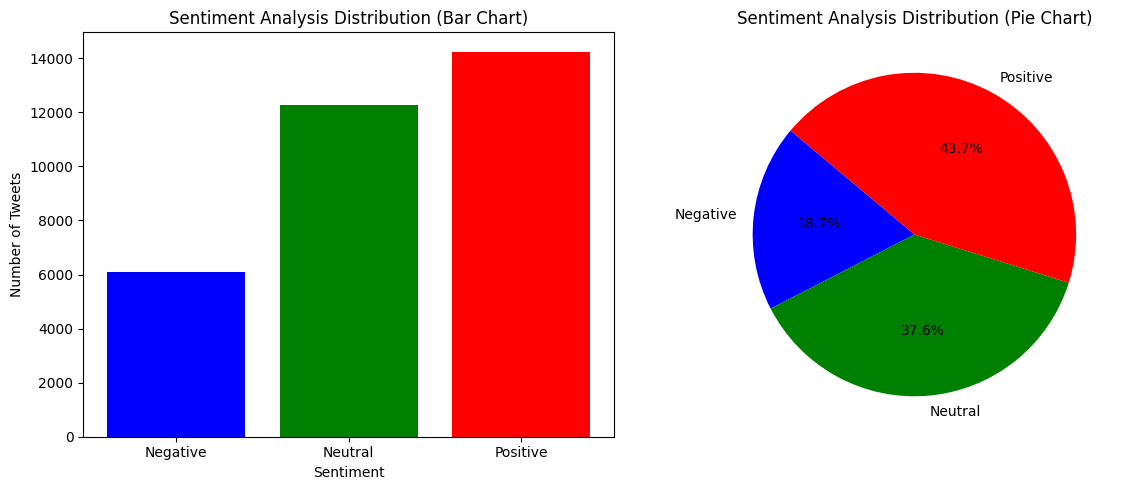

In [204]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from zipfile import ZipFile  # Import ZipFile specifically to avoid conflicts

# Load the trained model
model = pickle.load(open('trained_model.pkl', 'rb'))

# Assuming `X_test_tfidf` contains the transformed test data
# Predict all sentiments in the test set
predictions = model.predict(X_test_tfidf)

# Count each sentiment class
unique, counts = np.unique(predictions, return_counts=True)

# Reset `zip` to the built-in function in case it was overwritten
zip = __builtins__.zip

# Create a dictionary to map sentiment counts
sentiment_counts = dict(zip(unique, counts))

# Map the sentiments to labels
sentiment_labels = {0: "Neutral", 1: "Positive", -1: "Negative"}
sentiment_names = [sentiment_labels[sentiment] for sentiment in sentiment_counts.keys()]
sentiment_values = list(sentiment_counts.values())

# Plotting the results
plt.figure(figsize=(12, 5))

# Bar Chart
plt.subplot(1, 2, 1)
plt.bar(sentiment_names, sentiment_values, color=['blue', 'green', 'red'])
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.title("Sentiment Analysis Distribution (Bar Chart)")

# Pie Chart
plt.subplot(1, 2, 2)
plt.pie(sentiment_values, labels=sentiment_names, autopct='%1.1f%%', startangle=140, colors=['blue', 'green', 'red'])
plt.title("Sentiment Analysis Distribution (Pie Chart)")

plt.tight_layout()
plt.show()

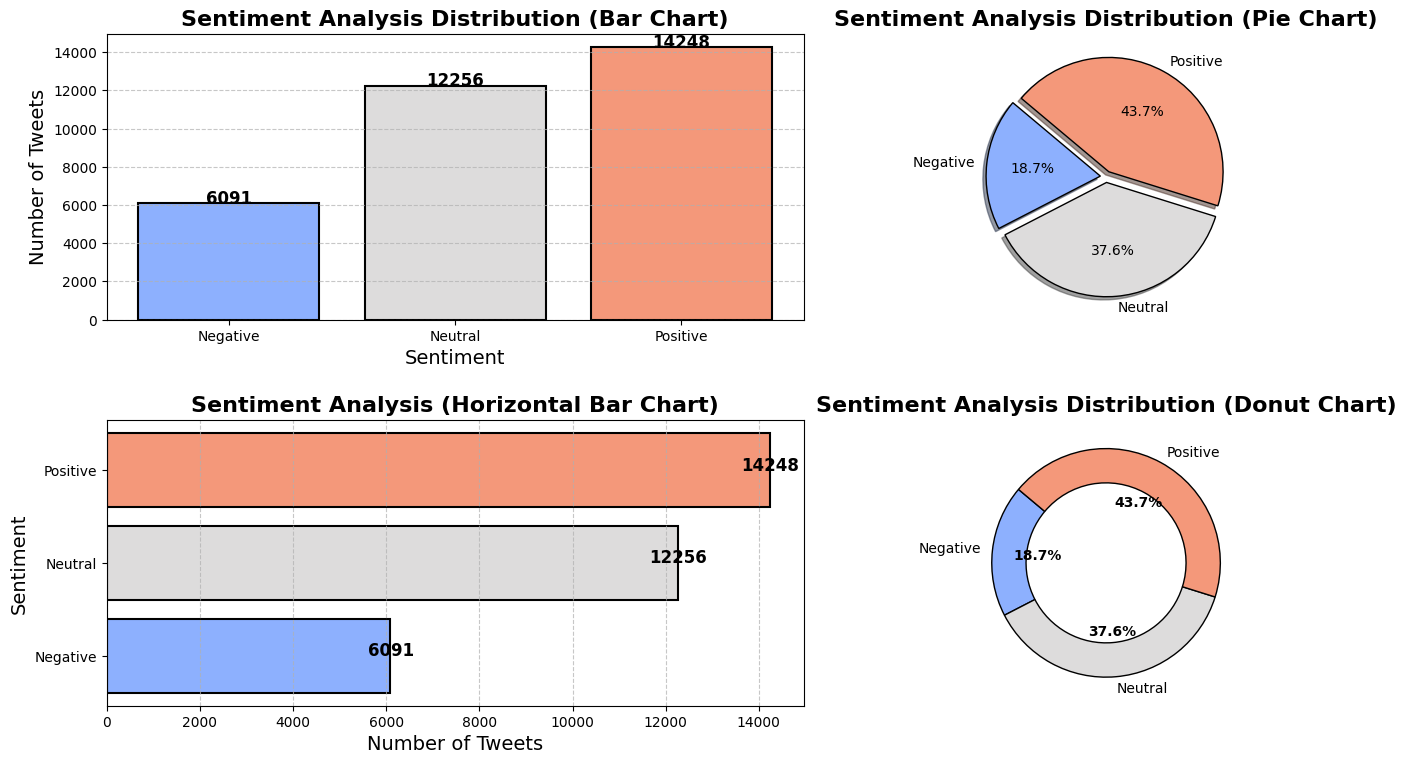

In [205]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Load the trained model
model = pickle.load(open('trained_model.pkl', 'rb'))

# Assuming `X_test_tfidf` contains the transformed test data
# Predict all sentiments in the test set
predictions = model.predict(X_test_tfidf)

# Count each sentiment class
unique, counts = np.unique(predictions, return_counts=True)
sentiment_counts = dict(zip(unique, counts))

# Map the sentiments to labels
sentiment_labels = {0: "Neutral", 1: "Positive", -1: "Negative"}
sentiment_names = [sentiment_labels[sentiment] for sentiment in sentiment_counts.keys()]
sentiment_values = list(sentiment_counts.values())

# Set a color palette using Seaborn for more vibrant visuals
sns.set_palette("pastel")
colors = sns.color_palette("coolwarm", len(sentiment_names))

# Create the figure for multiple subplots
plt.figure(figsize=(15, 8))

### 1. Enhanced Bar Chart ###
plt.subplot(2, 2, 1)
bars = plt.bar(sentiment_names, sentiment_values, color=colors, edgecolor='black', linewidth=1.5)
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Number of Tweets", fontsize=14)
plt.title("Sentiment Analysis Distribution (Bar Chart)", fontsize=16, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with the exact count
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', fontsize=12, fontweight='bold')

### 2. Enhanced Pie Chart with Exploding Effect ###
plt.subplot(2, 2, 2)
explode = [0.05] * len(sentiment_values)  # Slightly explode each slice for better visuals
plt.pie(sentiment_values, labels=sentiment_names, autopct='%1.1f%%', startangle=140,
        colors=colors, explode=explode, shadow=True, wedgeprops={'edgecolor': 'black'})
plt.title("Sentiment Analysis Distribution (Pie Chart)", fontsize=16, fontweight='bold')

### 3. Horizontal Bar Chart ###
plt.subplot(2, 2, 3)
bars = plt.barh(sentiment_names, sentiment_values, color=colors, edgecolor='black', linewidth=1.5)
plt.xlabel("Number of Tweets", fontsize=14)
plt.ylabel("Sentiment", fontsize=14)
plt.title("Sentiment Analysis (Horizontal Bar Chart)", fontsize=16, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate each bar with the exact count
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 2, bar.get_y() + bar.get_height() / 2, int(xval), ha='center', fontsize=12, fontweight='bold')

### 4. Donut Chart ###
plt.subplot(2, 2, 4)
wedges, texts, autotexts = plt.pie(sentiment_values, labels=sentiment_names, autopct='%1.1f%%', startangle=140,
                                   colors=colors, wedgeprops=dict(width=0.3, edgecolor='black'))
plt.setp(autotexts, size=10, weight="bold", color="black")
plt.title("Sentiment Analysis Distribution (Donut Chart)", fontsize=16, fontweight='bold')

plt.tight_layout(pad=2.0)
plt.show()

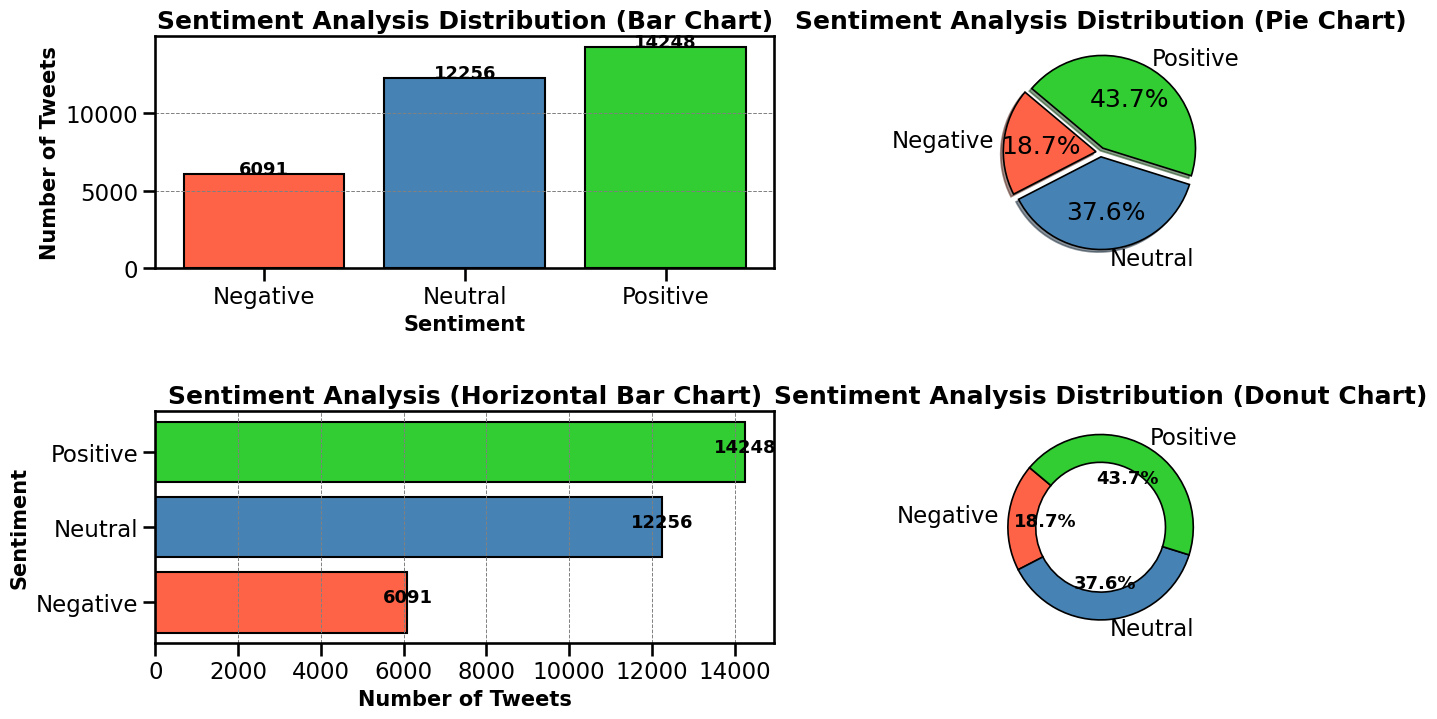

In [206]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Load the trained model
model = pickle.load(open('trained_model.pkl', 'rb'))

# Assuming `X_test_tfidf` contains the transformed test data
# Predict all sentiments in the test set
predictions = model.predict(X_test_tfidf)

# Count each sentiment class
unique, counts = np.unique(predictions, return_counts=True)
sentiment_counts = dict(zip(unique, counts))

# Map the sentiments to labels
sentiment_labels = {0: "Neutral", 1: "Positive", -1: "Negative"}
sentiment_names = [sentiment_labels[sentiment] for sentiment in sentiment_counts.keys()]
sentiment_values = list(sentiment_counts.values())

# High-contrast colors for the plots
colors = ["#FF6347", "#4682B4", "#32CD32"]  # Red, Blue, and Green
sns.set_context("talk")  # Larger font sizes for better contrast

# Create the figure for multiple subplots with high contrast
plt.figure(figsize=(15, 8))

### 1. High Contrast Bar Chart ###
plt.subplot(2, 2, 1)
bars = plt.bar(sentiment_names, sentiment_values, color=colors, edgecolor='black', linewidth=1.5)
plt.xlabel("Sentiment", fontsize=15, fontweight='bold', color='black')
plt.ylabel("Number of Tweets", fontsize=15, fontweight='bold', color='black')
plt.title("Sentiment Analysis Distribution (Bar Chart)", fontsize=18, fontweight='bold', color='black')
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

# Annotate each bar with the count
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', fontsize=13, fontweight='bold', color='black')

### 2. High Contrast Pie Chart with Dark Border ###
plt.subplot(2, 2, 2)
explode = [0.05] * len(sentiment_values)  # Explode effect for all slices
plt.pie(sentiment_values, labels=sentiment_names, autopct='%1.1f%%', startangle=140,
        colors=colors, explode=explode, shadow=True, wedgeprops={'edgecolor': 'black', 'linewidth': 1.2})
plt.title("Sentiment Analysis Distribution (Pie Chart)", fontsize=18, fontweight='bold', color='black')

### 3. High Contrast Horizontal Bar Chart ###
plt.subplot(2, 2, 3)
bars = plt.barh(sentiment_names, sentiment_values, color=colors, edgecolor='black', linewidth=1.5)
plt.xlabel("Number of Tweets", fontsize=15, fontweight='bold', color='black')
plt.ylabel("Sentiment", fontsize=15, fontweight='bold', color='black')
plt.title("Sentiment Analysis (Horizontal Bar Chart)", fontsize=18, fontweight='bold', color='black')
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

# Annotate each bar with the count
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 2, bar.get_y() + bar.get_height() / 2, int(xval), ha='center', fontsize=13, fontweight='bold', color='black')

### 4. High Contrast Donut Chart ###
plt.subplot(2, 2, 4)
wedges, texts, autotexts = plt.pie(sentiment_values, labels=sentiment_names, autopct='%1.1f%%', startangle=140,
                                   colors=colors, wedgeprops=dict(width=0.3, edgecolor='black', linewidth=1.2))
plt.setp(autotexts, size=13, weight="bold", color="black")
plt.title("Sentiment Analysis Distribution (Donut Chart)", fontsize=18, fontweight='bold', color='black')

plt.tight_layout(pad=2.0)
plt.show()


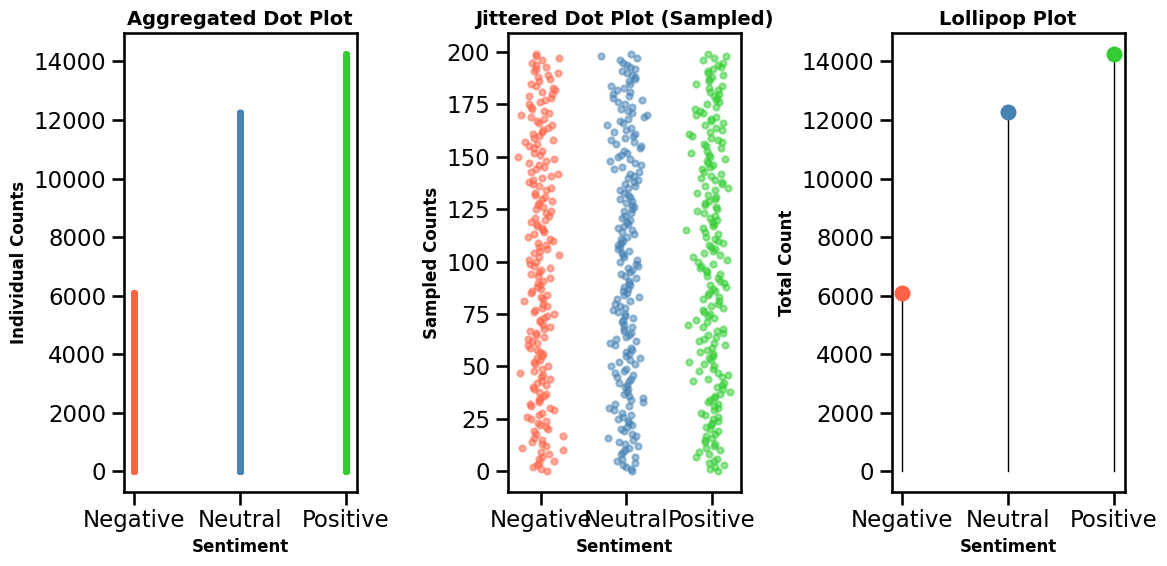

In [209]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load the trained model
model = pickle.load(open('trained_model.pkl', 'rb'))

# Assuming `X_test_tfidf` contains the transformed test data
# Predict all sentiments in the test set
predictions = model.predict(X_test_tfidf)

# Count each sentiment class
unique, counts = np.unique(predictions, return_counts=True)
sentiment_counts = dict(zip(unique, counts))

# Map the sentiments to labels
sentiment_labels = {0: "Neutral", 1: "Positive", -1: "Negative"}
sentiment_names = [sentiment_labels[sentiment] for sentiment in sentiment_counts.keys()]
sentiment_values = list(sentiment_counts.values())

# Define colors
colors = ['#FF6347', '#4682B4', '#32CD32']  # Red, Blue, Green for each sentiment

# Create the figure for multiple optimized dot plots
plt.figure(figsize=(12, 6))

### 1. Aggregated Dot Plot (Faster) ###
plt.subplot(1, 3, 1)
for i, value in enumerate(sentiment_values):
    plt.scatter([sentiment_names[i]] * value, np.arange(value), color=colors[i], s=10, alpha=0.6)
plt.xlabel("Sentiment", fontsize=12, fontweight='bold')
plt.ylabel("Individual Counts", fontsize=12, fontweight='bold')
plt.title("Aggregated Dot Plot", fontsize=14, fontweight='bold')

### 2. Jittered Dot Plot with Fewer Points ###
plt.subplot(1, 3, 2)
for i, value in enumerate(sentiment_values):
    # Generate fewer jittered points (sample for speed)
    jittered_x = np.random.normal(i, 0.1, min(value, 200))  # Limit to 200 points max for speed
    plt.scatter(jittered_x, np.arange(min(value, 200)), color=colors[i], s=20, alpha=0.5)
plt.xticks(ticks=range(len(sentiment_names)), labels=sentiment_names)
plt.xlabel("Sentiment", fontsize=12, fontweight='bold')
plt.ylabel("Sampled Counts", fontsize=12, fontweight='bold')
plt.title("Jittered Dot Plot (Sampled)", fontsize=14, fontweight='bold')

### 3. Lollipop Plot (Simple) ###
plt.subplot(1, 3, 3)
for i, value in enumerate(sentiment_values):
    plt.plot([i, i], [0, value], color="black", lw=1)
    plt.scatter(i, value, color=colors[i], s=100, zorder=3)
plt.xticks(ticks=range(len(sentiment_names)), labels=sentiment_names)
plt.xlabel("Sentiment", fontsize=12, fontweight='bold')
plt.ylabel("Total Count", fontsize=12, fontweight='bold')
plt.title("Lollipop Plot", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()